# breast-cancer-wisconsin

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importing datasets

In [2]:
data = pd.read_csv("breast-cancer-wisconsin.csv",na_values='?')
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10.0,3,2,1,2
1,1015425,3,1,1,1,2,2.0,3,1,1,2
2,1016277,6,8,8,1,3,4.0,3,7,1,2
3,1017023,4,1,1,3,2,1.0,3,1,1,2
4,1017122,8,10,10,8,7,10.0,9,7,1,4


In [3]:
data.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [4]:
# 'Sample code number' is not necessary for our prediction so we can drop 'Sample code number'
data.drop(['Sample code number'], axis = 1, inplace= True)
data.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

# Spliting Data for training and testing

In [5]:
from sklearn.model_selection import train_test_split
X_Data=data[['Clump Thickness', 'Uniformity of Cell Size','Uniformity of Cell Shape', 'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli', 'Mitoses']]
y_Data=data[['Class']]
X_train,X_test,y_train,y_test = train_test_split(X_Data,y_Data,test_size=0.2,random_state=42)

# Data imputation

In [6]:
from sklearn.impute import KNNImputer
nan = np.nan
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit_transform(X_train,y_train)
imputer.fit_transform(X_test,y_test)

array([[ 9.,  9., 10., ...,  7., 10.,  6.],
       [ 6.,  1.,  1., ...,  3.,  1.,  1.],
       [ 4.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [ 5.,  1.,  1., ...,  2.,  2.,  1.],
       [ 1.,  4.,  3., ...,  5.,  6.,  1.],
       [ 8.,  6.,  4., ...,  3.,  1.,  1.]])

In [7]:
data.isnull().sum(axis=0)

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [8]:
# here all the missing attributes are from 'Bare Nuclei' so I dropped 'Bare Nuclei' column from the dataset
data.drop(['Bare Nuclei'], axis = 1, inplace= True)
data.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli',
       'Mitoses', 'Class'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split
X_Data=data[['Clump Thickness', 'Uniformity of Cell Size','Uniformity of Cell Shape', 'Marginal Adhesion','Single Epithelial Cell Size','Bland Chromatin','Normal Nucleoli', 'Mitoses']]
y_Data=data[['Class']]
X_train,X_test,y_train,y_test = train_test_split(X_Data,y_Data,test_size=0.2)

# Decision Trees

In [10]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, np.ravel(y_train,order='C'))
predictDT=modelDT.predict(X_test)

              precision    recall  f1-score   support

           2       0.94      0.97      0.96        88
           4       0.94      0.90      0.92        52

    accuracy                           0.94       140
   macro avg       0.94      0.93      0.94       140
weighted avg       0.94      0.94      0.94       140



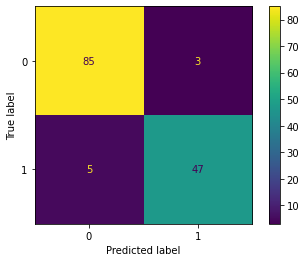

In [11]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictDT)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictDT))


# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
modelRFC=RandomForestClassifier()
modelRFC.fit(X_train, np.ravel(y_train,order='C'))
predictRFC=modelRFC.predict(X_test)

              precision    recall  f1-score   support

           2       0.97      0.95      0.96        88
           4       0.92      0.94      0.93        52

    accuracy                           0.95       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.95      0.95      0.95       140



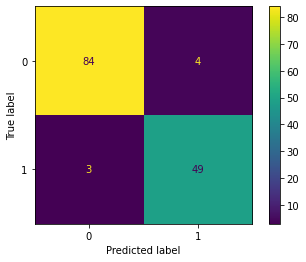

In [13]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictRFC)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictRFC))

# Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
modelGNB = GaussianNB()
modelGNB.fit(X_train, np.ravel(y_train,order='C'))
predictGNB=modelGNB.predict(X_test)

              precision    recall  f1-score   support

           2       0.99      0.95      0.97        88
           4       0.93      0.98      0.95        52

    accuracy                           0.96       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



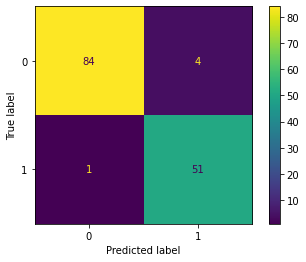

In [15]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictGNB)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictGNB))

# AdaBoost

In [16]:
from sklearn.ensemble import AdaBoostClassifier
modelAda = AdaBoostClassifier()
modelAda.fit(X_train, np.ravel(y_train,order='C'))
predictAda=modelAda.predict(X_test)

              precision    recall  f1-score   support

           2       0.99      0.95      0.97        88
           4       0.93      0.98      0.95        52

    accuracy                           0.96       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



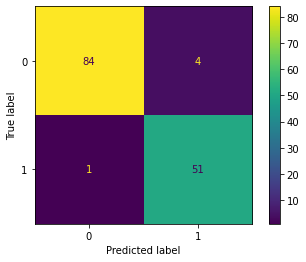

In [17]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictAda)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictAda))

# Data normalization

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)

#scaler.fit(y_train)
#y_train_normalized = scaler.transform(y_train)

scaler.fit(X_test)
X_test_normalized = scaler.transform(X_test)

scaler.fit(y_train)
y_test_normalized = scaler.transform(y_test)


# K-Nearest Neighbours

In [19]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN =  KNeighborsClassifier()
modelKNN.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictKNN=modelKNN.predict(X_test_normalized)

              precision    recall  f1-score   support

           2       0.97      0.95      0.96        88
           4       0.92      0.94      0.93        52

    accuracy                           0.95       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.95      0.95      0.95       140



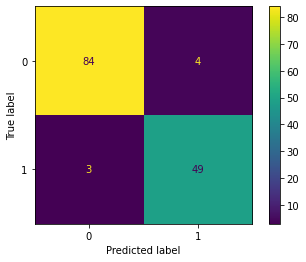

In [20]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictKNN)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictKNN))


# Support Vector Machine

In [21]:
#Support Vector Classifier
from sklearn.svm import SVC
modelSVC = SVC(probability= True)
modelSVC.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictSVC=modelSVC.predict(X_test_normalized)

              precision    recall  f1-score   support

           2       0.98      0.95      0.97        88
           4       0.93      0.96      0.94        52

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



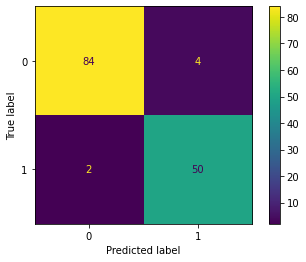

In [22]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictSVC)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictSVC))

In [23]:
# Linear Support Vector Classifier
from sklearn.svm import LinearSVC
modelLSVC = LinearSVC()
modelLSVC.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictLSVC=modelLSVC.predict(X_test_normalized)

              precision    recall  f1-score   support

           2       0.98      0.95      0.97        88
           4       0.93      0.96      0.94        52

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



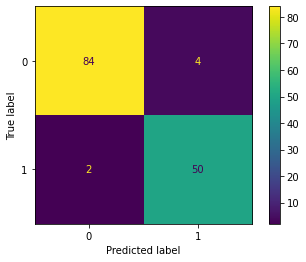

In [24]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictLSVC)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictLSVC))

# Multi-Layer Perceptron

In [25]:
from sklearn.neural_network import MLPClassifier
modelMLP =  MLPClassifier()
modelMLP.fit(X_train_normalized, np.ravel(y_train,order='C'))
predictMLP=modelMLP.predict(X_test_normalized)

              precision    recall  f1-score   support

           2       0.97      0.95      0.96        88
           4       0.92      0.94      0.93        52

    accuracy                           0.95       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.95      0.95      0.95       140



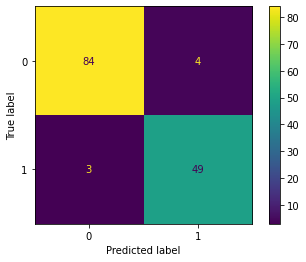

In [26]:
##evaluation of metrices

#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,predictMLP)
cm_display = ConfusionMatrixDisplay(cm).plot()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictMLP))

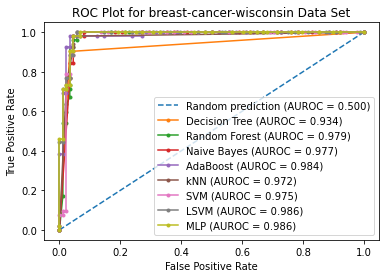

In [27]:
r_probs =[0 for _ in range(len(y_test_normalized))]
dt_probs=modelDT.predict_proba(X_test)
rf_probs=modelRFC.predict_proba(X_test)
nb_probs=modelGNB.predict_proba(X_test)
ada_probs=modelAda.predict_proba(X_test)
knn_probs=modelKNN.predict_proba(X_test_normalized)
svm_probs=modelSVC.predict_proba(X_test_normalized)
lsvm_probs=modelLSVC._predict_proba_lr(X_test_normalized)
mlp_probs=modelMLP.predict_proba(X_test_normalized)

dt_probs=dt_probs[:,1]
rf_probs=rf_probs[:, 1]
nb_probs=nb_probs[:, 1]
ada_probs=ada_probs[:, 1]
knn_probs=knn_probs[:, 1]
svm_probs=svm_probs[:, 1]
lsvm_probs=lsvm_probs[:, 1]
mlp_probs=mlp_probs[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score

r_auc=roc_auc_score(y_test_normalized,r_probs)
dt_auc= roc_auc_score(y_test_normalized,dt_probs)
rf_auc= roc_auc_score(y_test_normalized,rf_probs)
nb_auc= roc_auc_score(y_test_normalized,nb_probs)
ada_auc= roc_auc_score(y_test_normalized,ada_probs)
knn_auc= roc_auc_score(y_test_normalized,knn_probs)
svm_auc= roc_auc_score(y_test_normalized,svm_probs)
lsvm_auc= roc_auc_score(y_test_normalized,lsvm_probs)
mlp_auc= roc_auc_score(y_test_normalized,mlp_probs)

r_fpr,r_tpr, _ = roc_curve(y_test_normalized,r_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test_normalized,dt_probs)
rf_fpr, rf_tpr, _= roc_curve(y_test_normalized,rf_probs)
nb_fpr, nb_tpr, _= roc_curve(y_test_normalized,nb_probs)
ada_fpr, ada_tpr, _= roc_curve(y_test_normalized,ada_probs)
knn_fpr, knn_tpr, _= roc_curve(y_test_normalized,knn_probs)
svm_fpr, svm_tpr, _= roc_curve(y_test_normalized,svm_probs)
lsvm_fpr, lsvm_tpr, _= roc_curve(y_test_normalized,lsvm_probs)
mlp_fpr, mlp_tpr, _= roc_curve(y_test_normalized,mlp_probs)

import matplotlib.pyplot as plt

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(ada_fpr, ada_tpr, marker='.', label='AdaBoost (AUROC = %0.3f)' % ada_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='kNN (AUROC = %0.3f)' % knn_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(lsvm_fpr, lsvm_tpr, marker='.', label='LSVM (AUROC = %0.3f)' % lsvm_auc)
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='MLP (AUROC = %0.3f)' % mlp_auc)

# Title
plt.title('ROC Plot for breast-cancer-wisconsin Data Set')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()